# Nearly free electron model


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

a = math.pi #lattice constant -- defining this lattice constant, g = 2*pi/a = 2
ks = np.arange(-10.0, 10.1, 0.01)


In [2]:
def fE1(k):
    g= 2*math.pi/a
    Uck = 0
    E1 = Uck +(k+2*g)**2
    return(E1)
def fE2(k):
    g= 2*math.pi/a
    Uck_g = 0
    E2 = Uck_g +(k)**2
    return(E2)
def fE3(k):
    g= 2*math.pi/a
    Uck__g = 0
    E3 = Uck__g +(k+g)**2
    return(E3)

In [3]:
def fE4(k):
    ur=.2
    E4 = (fE2(k)+fE3(k))/2 + (0.25*(fE2(k)-fE3(k))**2+ ur**2)**0.5
    return(E4)
def fE5(k):
    ur=.2
    E5 = (fE2(k)+fE3(k))/2 - (0.25*(fE2(k)-fE3(k))**2+ ur**2)**0.5
    return(E5)
def fE6(k):
    ur_2=.2
    E6 = (fE2(k)+fE1(k))/2 + (0.25*(fE2(k)-fE1(k))**2+ ur_2**2)**0.5
    return(E6)
def fE7(k):
    ur_2=.2
    E7 = (fE2(k)+fE1(k))/2 - (0.25*(fE2(k)-fE1(k))**2+ ur_2**2)**0.5
    return(E7)
    

(-2.0, 2.0)

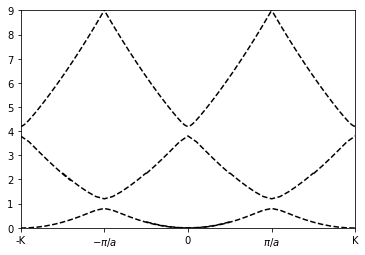

In [10]:
ks_ = np.arange(0.0,2.1,0.1)
ks_1 = np.arange(-2.0,0.1,0.1)
ks_2 = np.arange(-1.0,0.1,0.1)
ks_3 = np.arange(0.0,1.1,0.1)
ks_7= np.arange(0.5,1.6,0.1)
ks_8= np.arange(-1.5,-0.4,0.1)
ks_4= np.arange(-2.0,-1.4,0.1)
ks_6= np.arange(1.5,2.6,0.1)
ks_5= np.arange(-0.5,0.6,0.1)

plt.plot(ks, fE6(ks-4), linestyle= 'dashed', color = 'black')
plt.plot(ks_5, fE7(ks_5-4), linestyle= 'dashed', color = 'black')
plt.plot(ks, fE6(ks), linestyle= 'dashed', color = 'black')
plt.plot(ks_4, fE7(ks_4), linestyle= 'dashed', color = 'black')
plt.plot(ks_5, fE7(ks_5-2), linestyle= 'dashed', color = 'black')
plt.plot(ks, fE6(ks-2), linestyle= 'dashed', color = 'black')
plt.plot(ks_6, fE7(ks_6-4),linestyle= 'dashed', color = 'black')
plt.plot(ks_8, fE4(ks_8), linestyle= 'dashed', color = 'black') 
plt.plot(ks_1, fE5(ks_1), linestyle= 'dashed', color = 'black') 
plt.plot(ks_, fE5(ks_-2), linestyle= 'dashed', color = 'black')
plt.plot(ks_7, fE4(ks_7-2), linestyle= 'dashed', color = 'black')

x =[-2,-1,0,1,2]
labels1 =['-K','$-\pi/a$', '0','$\pi/a$', 'K']
plt.xticks(x, labels1)

plt.ylim((0, 9))
plt.xlim((-2, 2))